In [1]:
import rioxarray as rxr
import xarray as xr
import numpy as np
import earthpy.plot as ep
import earthpy.spatial as es

from glob import glob
import os, sys

In [7]:
def process_sentinel_nc(filepath):
    l2r = rxr.open_rasterio(filepath)
    
    # Attempt to create a dataArray from the dataset
    # First grab the coordinates
    y = l2r['y'].values
    x = l2r['x'].values
    band_vals = np.array(["1", "2", "3", "4", "5", "6", "7", "8", "11", "12", "8A"])

    # Get list of bands to stack - use list(l2r.keys()) to get list of data variables
    # Note there are no BOA for bands 9 and 10 since those are water vapour and cirrus bands
    target_bands = ["rhos_443", 'rhos_492', 'rhos_560', 'rhos_665', 'rhos_704', \
                    'rhos_740', 'rhos_783', 'rhos_833', 'rhos_865', 'rhos_1614','rhos_2202']

    # Extract band data from the dataset
    band_data = [l2r[band].data.squeeze() for band in target_bands]

    # Create a dataArray with the appropriate coordinates
    L_output = xr.DataArray(band_data, coords={'y':y, 'x':x, 'band':band_vals}, dims=['band', 'y', 'x'])

    # Set nans to np.nan, and ensure that the rio part knows that its np.nan
    L_output = L_output.where(L_output <= 1, np.nan)
    L_output.rio.write_nodata(np.nan, inplace = True)
    L_output.rio.write_crs(l2r.rio.crs, inplace=True)
    L_output.rio.write_transform()
    
    product_id = os.path.basename(filepath).split(".")[0]
    
    L_output.rio.to_raster(f"output/stacked_{product_id}.tif")

In [8]:
process_sentinel_nc("output/S2A_MSI_2018_11_14_14_31_18_T20JLL_L2R.nc")

In [2]:
l2r = rxr.open_rasterio("output/S2A_MSI_2017_02_22_14_23_57_T20JLL_L2R.nc")

l2r

<xarray.Dataset>
Dimensions:              (band: 1, x: 1049, y: 1370)
Coordinates:
  * band                 (band) int32 1
  * x                    (x) float64 3.549e+05 3.549e+05 ... 3.653e+05 3.653e+05
  * y                    (y) float64 6.535e+06 6.535e+06 ... 6.522e+06 6.522e+06
    transverse_mercator  int32 0
Data variables: (12/29)
    lon                  (band, y, x) float32 ...
    rhot_560             (band, y, x) float32 ...
    rhos_560             (band, y, x) float32 ...
    rhot_665             (band, y, x) float32 ...
    rhos_665             (band, y, x) float32 ...
    rhot_704             (band, y, x) float32 ...
    ...                   ...
    vza                  (band, y, x) float32 ...
    raa                  (band, y, x) float32 ...
    rhot_443             (band, y, x) float32 ...
    rhos_443             (band, y, x) float32 ...
    rhot_492             (band, y, x) float32 ...
    rhos_492             (band, y, x) float32 ...
Attributes: (12/381)
    10_f0:                                     3585.781663850883
    10_name:                                   1373
    10_wave:                                   1373.462016539926
    11_f0:                                     2368.999295746866
    11_name:                                   1614
    11_wave:                                   1613.659319714372
    ...                                        ...
    wind_default:                              2
    worldview_reproject:                       False
    worldview_reproject_method:                nearest
    worldview_reproject_resolution:            2
    xrange:                                    [354850. 365340.]
    yrange:                                    [6535260. 6521560.]

In [3]:
# Attempt to create a dataArray from the dataset
# First grab the coordinates
y = l2r['y'].values
x = l2r['x'].values
band_vals = np.array(["1", "2", "3", "4", "5", "6", "7", "8", "11", "12", "8A"])

# Get list of bands to stack - use list(l2r.keys()) to get list of data variables
# Note there are no BOA for bands 9 and 10 since those are water vapour and cirrus bands
target_bands = ["rhos_443", 'rhos_492', 'rhos_560', 'rhos_665', 'rhos_704', \
                'rhos_740', 'rhos_783', 'rhos_833', 'rhos_865', 'rhos_1614','rhos_2202']

# Extract band data from the dataset
band_data = [l2r[band].data.squeeze() for band in target_bands]

# Create a dataArray with the appropriate coordinates
L_output = xr.DataArray(band_data, coords={'y':y, 'x':x, 'band':band_vals}, dims=['band', 'y', 'x'])

# Set nans to np.nan, and ensure that the rio part knows that its np.nan
L_output = L_output.where(L_output <= 1, np.nan)
L_output.rio.write_nodata(np.nan, inplace = True)
L_output.rio.write_crs(es.crs_check("output/S2A_MSI_2017_02_22_14_23_57_T20JLL_L2R.nc"), inplace=True)
L_output.rio.write_transform()

L_output.rio.to_raster("output/stacked_BOA.tif")

C:\Users\tranq\anaconda3\envs\gdal\Lib\site-packages\rasterio\__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


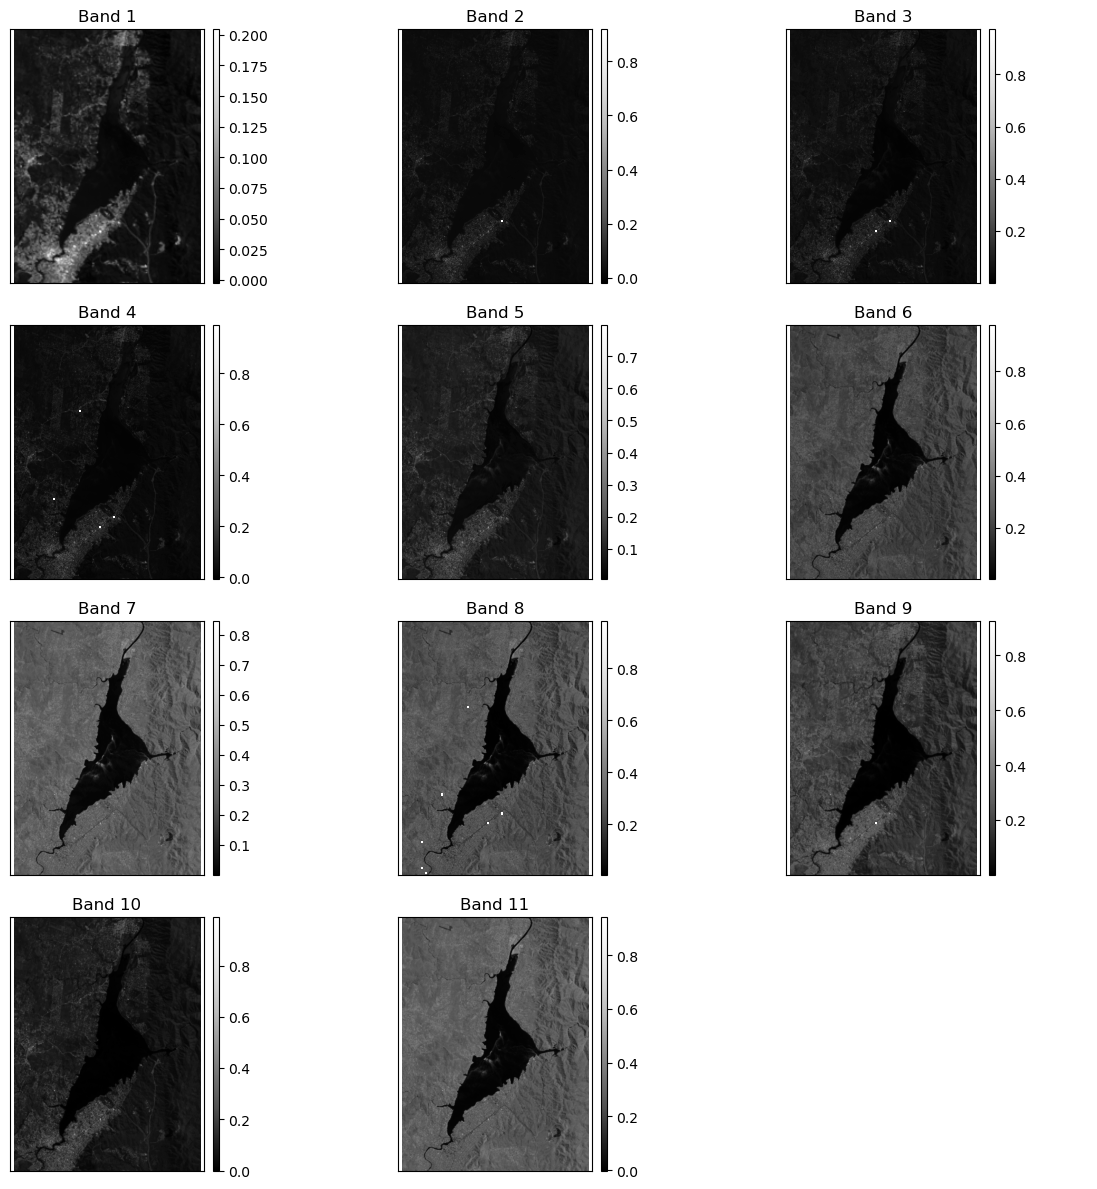

array([[<Axes: title={'center': 'Band 1'}>,
        <Axes: title={'center': 'Band 2'}>,
        <Axes: title={'center': 'Band 3'}>],
       [<Axes: title={'center': 'Band 4'}>,
        <Axes: title={'center': 'Band 5'}>,
        <Axes: title={'center': 'Band 6'}>],
       [<Axes: title={'center': 'Band 7'}>,
        <Axes: title={'center': 'Band 8'}>,
        <Axes: title={'center': 'Band 9'}>],
       [<Axes: title={'center': 'Band 10'}>,
        <Axes: title={'center': 'Band 11'}>, <Axes: >]], dtype=object)

In [4]:
ep.plot_bands(L_output)

In [5]:
# ds = rxr.open_rasterio('output/stacked_BOA.tif')

# ds

In [6]:
# ep.plot_rgb(ds.data, rgb = (3,2,1), stretch = True)

In [6]:
test_path = "output/S2A_MSI_2017_02_22_14_23_57_T20JLL_L2R.nc"

os.path.basename(test_path).split(".")[0]

'S2A_MSI_2017_02_22_14_23_57_T20JLL_L2R'